#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Loading data

In [ ]:
df=pd.read_csv('hotel_booking.csv')

#Exploratory Data Analysis

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
#checking all columns info
df.info()

In [ ]:
#converting reservation_status_date colum from object type to date type
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.describe(include='object')

In [ ]:
#retrieving object type columns and their unique values. 
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('_'*50)

In [ ]:
#checking missing values for each column
df.isnull().sum()

In [ ]:
#removing columns with lot of missing values
df.drop('company',axis=1,inplace=True)
df.drop('agent',axis=1,inplace=True)

In [ ]:
#now removing the null rows
df.dropna(inplace=True)

In [ ]:
#Removing the outlier in adr column
df=df[df['adr']<5000]

In [ ]:
canceled_percentage=df['is_canceled'].value_counts(normalize=True)
print(canceled_percentage)

plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts())
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.title('Reservation status on different hotels')
plt.xlabel('hotel')
plt.ylabel('Number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

In [ ]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

In [ ]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts()

In [ ]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

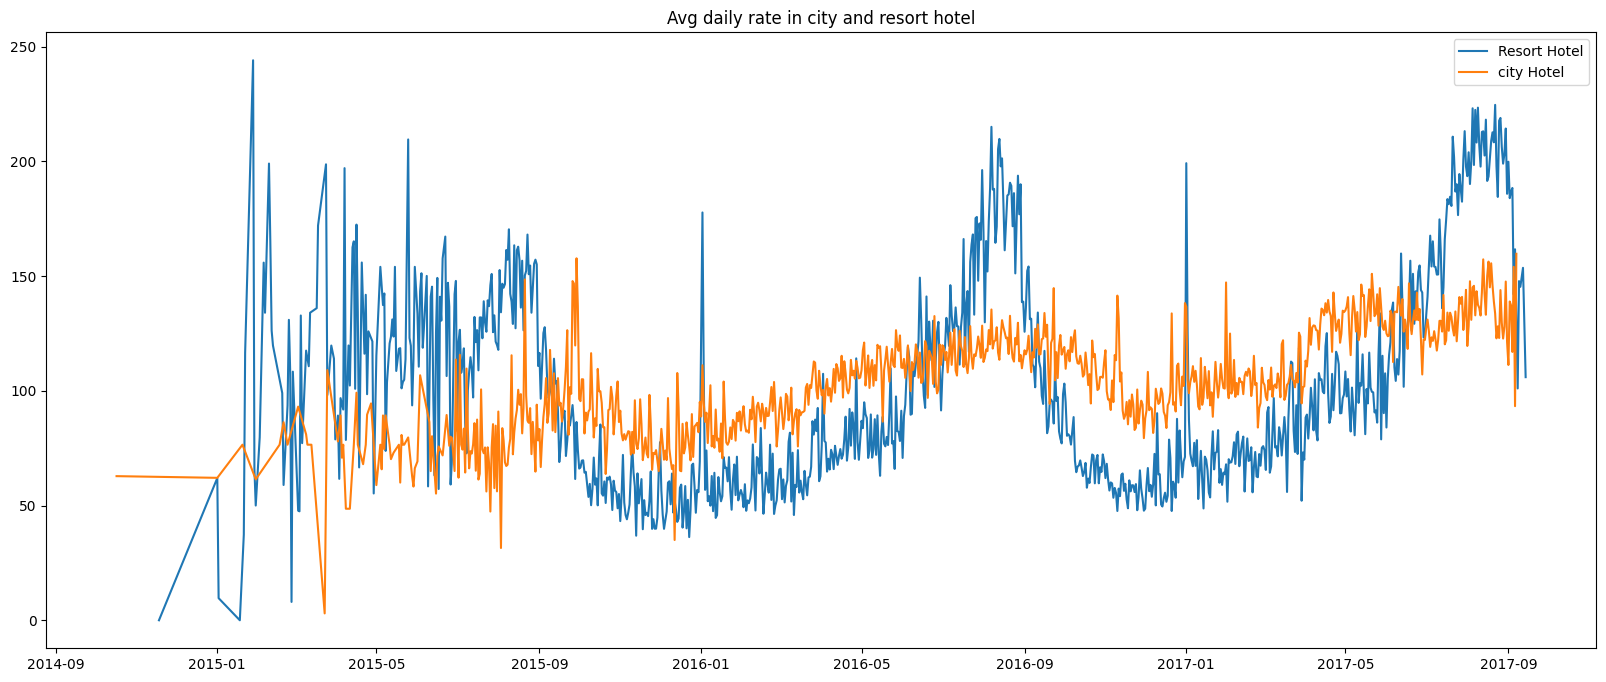

In [39]:
plt.figure(figsize=(20,8))
plt.title('Avg daily rate in city and resort hotel')
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='city Hotel')
plt.legend()
plt.show()

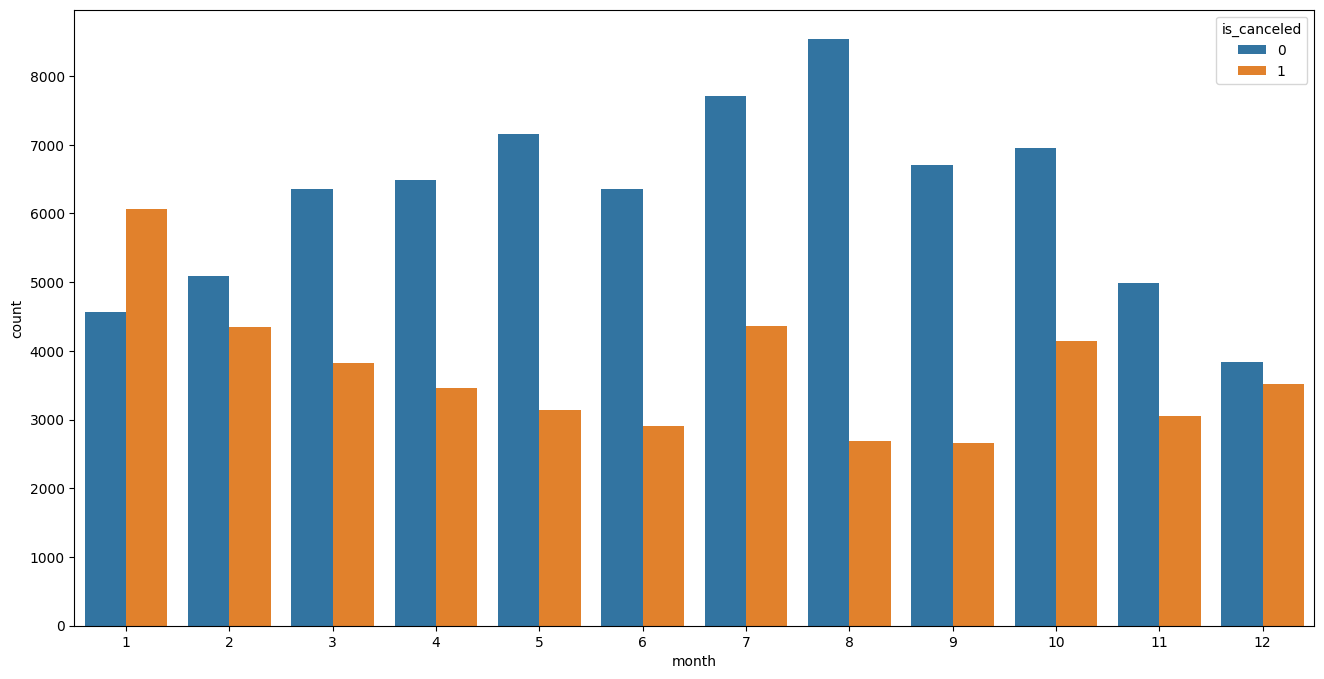

In [42]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
sns.countplot(x='month',hue='is_canceled',data=df)
plt.show()

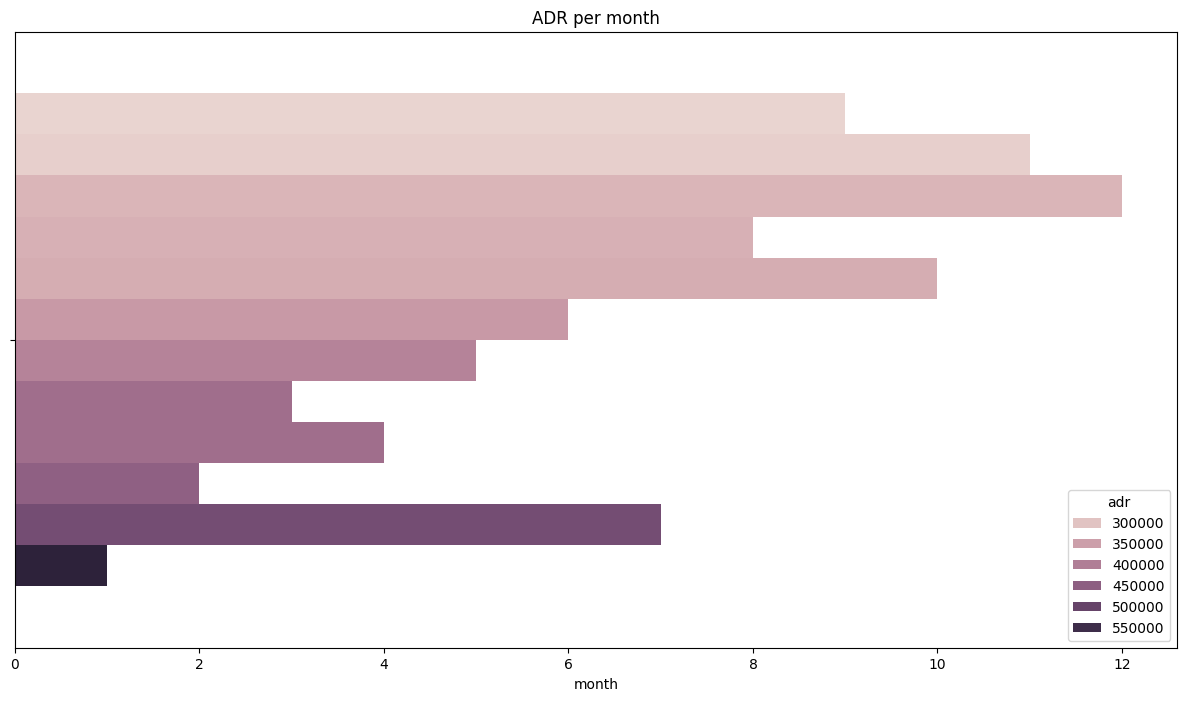

In [60]:
plt.figure(figsize=(15,8))
plt.title('ADR per month')
sns.barplot(x='month',hue='adr',data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum())
plt.show()

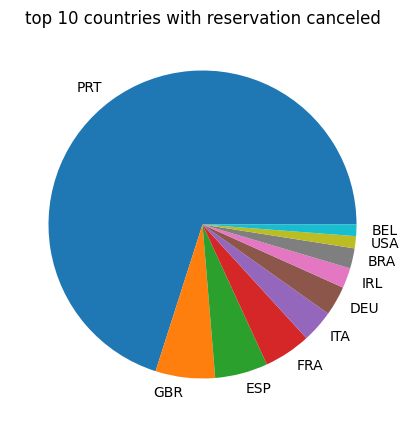

In [65]:
canceled_data=df[df['is_canceled'] == 1]
top_10_countries=canceled_data['country'].value_counts()[:10]
plt.figure(figsize=(5,5))
plt.title('top 10 countries with reservation canceled')
plt.pie(top_10_countries,labels=top_10_countries.index)
plt.show()